# Digital Signal Processing

### MsCV - ViBOT - MAIA

In [1]:
%matplotlib inline
%pprint off

# To make some nice plot
import matplotlib.pyplot as plt
# To play with arrays
import numpy as np

Pretty printing has been turned OFF


## Reminder 1 

Plot $x(t) = sin(2\pi f t)$,  $f = 1 Hz$

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


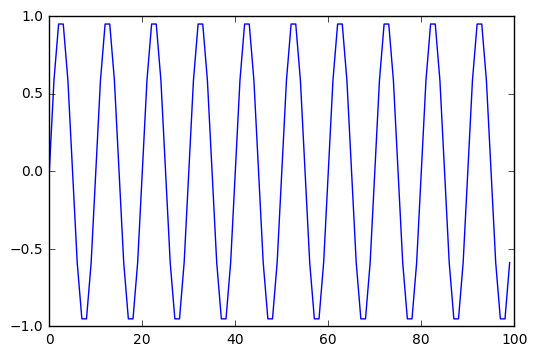

In [2]:
start = 0
fin = 10
step = 0.1

N = (fin-start)/(step)

M = np.zeros(N)

xdata = np.arange(start,fin,step)

j=0
for i in xdata: 
    M[j]=np.sin(2*np.pi*i)
    j=j+1
      
plt.plot(M)

Plot $x[n] = sin(2\pi f n)$ with frequency step of $f_s$
$$x[n] = sin(2\pi\frac{f}{f_s}n)$$

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


<Container object of 3 artists>

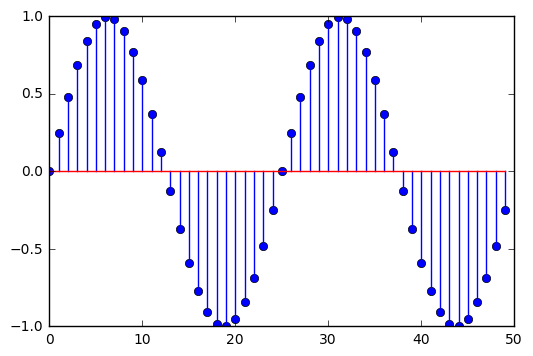

In [3]:
start = 0
fin = 10
step = 0.2

N = (fin-start)/(step)

M = np.zeros(N)

xdata = np.arange(start,fin,step)
 
s=np.sin(2*np.pi*step*xdata)
      
plt.stem(s)

## Exercise 1 - Causality

 **1.1** Considering the system defined by the equation $y_k=(x_k+x_{k+1})/2$, check its causality property by examining the response to the signal $H(k-4)$ or `step(4,N)`.

[ 0.  0.  0.  0.  1.  1.  1.  1.  1.  0.]
[ 0.   0.   0.   0.5  1.   1.   1.   1.   0.5  0. ]


<Container object of 3 artists>

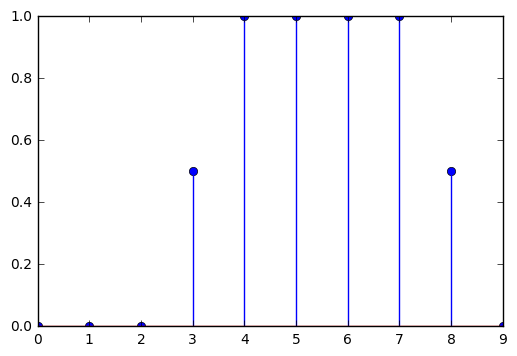

In [4]:
def step(n, N):
    myStep = np.zeros(N)
    if(n >= 0 & n < N):
        myStep[n:N-1] = 1
    
    else:
        print('ERROR : n out of range')
    
    return myStep
        
N=10

xk=step(4,N)

print (xk)

M = np.zeros(N)

for i in np.arange(0,N-1):
    M[i]=(xk[i]+xk[i+1])/2
    
print (M)

plt.stem(M)

**1.2** Propose a modification to obtain a causal version

[ 0.  0.  0.  0.  1.  1.  1.  1.  1.  0.]
[ 0.   0.   0.   0.   0.5  1.   1.   1.   1.   0. ]


<Container object of 3 artists>

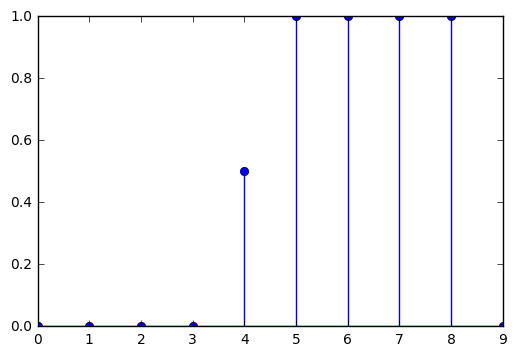

In [5]:
N=10

xk=step(4,N)

print (xk)

M = np.zeros(N)

for i in np.arange(0,N-1):
    M[i]=(xk[i-1]+xk[i])/2
    
print (M)

plt.stem(M)

Comments on your observations

## Exercise 2 - stability

**2.1** Program the primitive (accumulator) operator `prim(f)` applied on the signal  `f` of length `N`. The value of the vector returned by `prim` at the index `k` will correspond to $F_k$ with `k` $\leq$ `N`. Note $F_k=\sum_{q=-\infty}^{k}f_k$. Discuss on the result of the primitive operator applied to the signal $H(k-4)$. Is the primitive operator stable ?



In [6]:
def prim (f, N):

    M = np.zeros(N)   
    s = 0
   
    for i in np.arange(0,N):
        for j in np.arange(0,i):
            M[i]=M[i]+f[j]
    return M

[ 0.  0.  0.  0.  1.  1.  1.  1.  1.  0.]
[ 0.  0.  0.  0.  0.  1.  2.  3.  4.  5.]


<Container object of 3 artists>

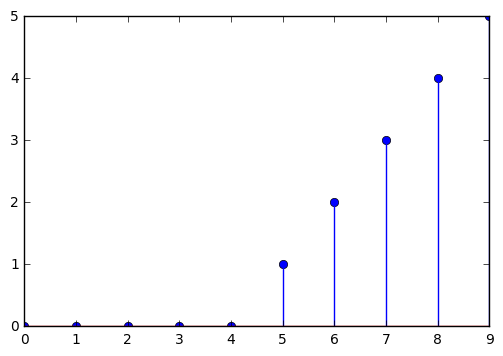

In [7]:
N=10
st = step(4,N)
print (st)
pr=prim(st,N)
print (pr)
plt.stem(pr)

# The primitive operator is unstable, being not bounded

**2.2** What is the impulse response of the primitive operator (in the discrete domain) ?

[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


<Container object of 3 artists>

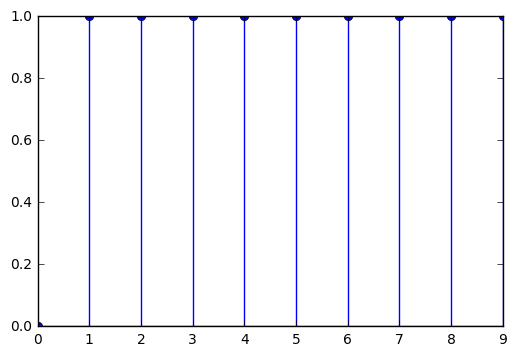

In [8]:
def dirac(n=0, N=20):
    if(n >= 0 & n < N):
       myDirac = np.zeros(N)
       myDirac[n] = 1 
    else :
        print('ERROR : n out of range')
    return myDirac

dirc = dirac(0,10)
print (dirc)
print (prim(dirc,10))

plt.stem(prim(dirc,10))


**2.3** Test the stability of the system defined by the equation: $y_k=x_k+2y_{k-1}$. Plot the impulse response.

[ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.]
[ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.]
[ 0.  0.  0.  0.  1.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.]
[ 0.  0.  0.  0.  1.  2.  4.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.]
[ 0.  0.  0.  0.  1.  2.  4.  8.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.]
[  0.   0.   0.   0.   1.   2.   4.   8.  16.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.]
[  0.   0.   0.   0.   1.   2.   4.   8.  16.  32.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.]
[  0.   0.   0.   0.   1.   2.   4.   8.  16.  

<Container object of 3 artists>

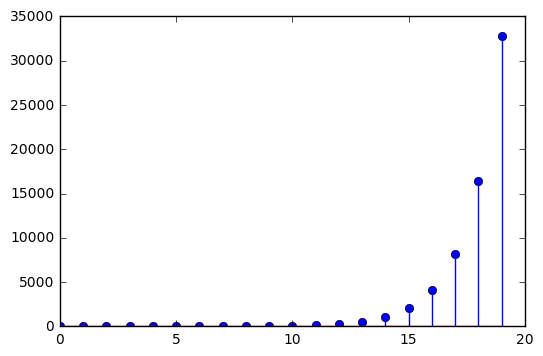

In [9]:
def dirac(n, N):
    if n>N-1:
        raise ValueError ("n should be < N-1")
            
    s=np.zeros(N)
            
    s[n]=1 
    return s



N=20
M = np.zeros(N)
xk=dirac(4, N)
print (xk)

for i in np.arange(0,N):
    M[i]=xk[i]+2*M[i-1]

    print (M)
plt.stem(M)


#### **2.4** Test the stability of the system defined by the equation: $y_k=x_k+y_{k-1}/3$. 

Plot the impulse response.

[ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.]
[ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.]
[ 0.          0.          0.          0.          1.          0.66666667
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.        ]
[ 0.          0.          0.          0.          1.          0.66666667
  0.44444444  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.        ]
[ 0.          0.          0.  

<Container object of 3 artists>

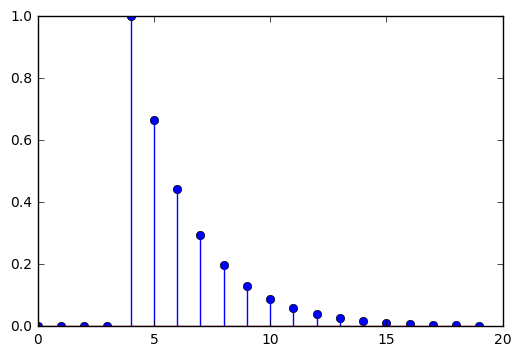

In [10]:
def dirac(n, N):
    if n>N-1:
        raise ValueError ("n should be < N-1")
            
    s=np.zeros(N)
            
    s[n]=1 
    return s



N=20
M = np.zeros(N)
xk=dirac(4, N)
print (xk)

for i in np.arange(0,N):
    M[i]=xk[i]+2*M[i-1]/3

    print (M)
plt.stem(M)

Comments your observations

Stable system implies bounding the signal by a certain value. 
We can clearly see the signal values approaching infinity and zero in 2.3 and 2.4 respectively.
Therefore, 2.3 is unstable and 2.4 is stable.

## Excercise 3 - Invariance and linearity
 

**3.1** Define the following signals: ${\tt x_a=[0\, 0\,  0 \, 0 \, 1 \, 2 \, 3 \, 4 \, 5 \, 0 \, 0 \, 0 \, 0\,  0\,  0\,  0\,  0\,  0\,  0]; x_b=[0\,  0 \, 0 \, 0 \, 0 \, 0 \, 0 \, 0 \, 0 \, 4 \, 3 \, 2 \, 1 \, 0 \, 0 \, 0 \, 0 \, 0 \, 0];}$. Compute the responses $y_a$, $y_b$ according to the equation $y=3x_{k-1}-2x_k+x_{k+1}$

plot your responses with their corresponding input.


[ 0.  0.  0.  0.  1.  2.  3.  4.  5.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  4.  3.  2.  1.  0.  0.  0.  0.  0.
  0.]
[  0.   0.   0.   1.   0.   2.   4.   6.   2.  15.   0.   0.   0.   0.   0.
   0.   0.   0.   0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  4. -5.  8.  6.  4.  3.  0.  0.  0.  0.
  0.]


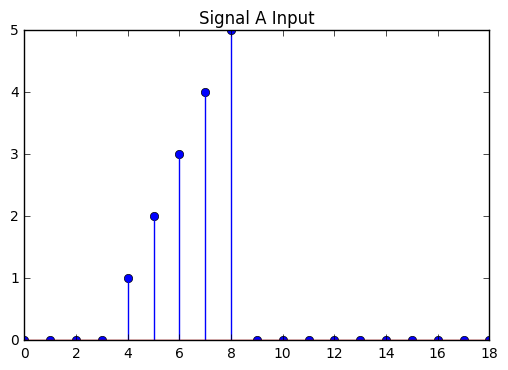

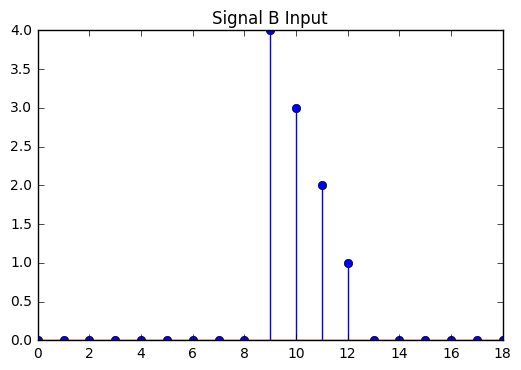

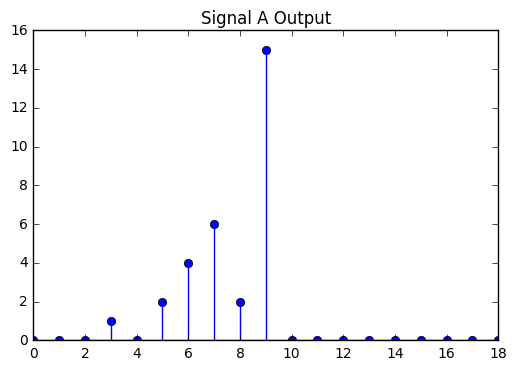

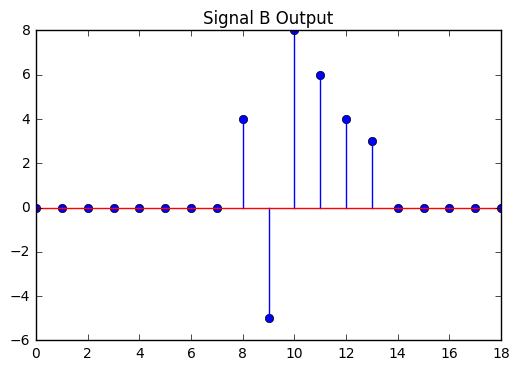

In [19]:
A=np.zeros(19)
A[4]=1
A[5]=2
A[6]=3
A[7]=4
A[8]=5
print(A)



B=np.zeros(19)
B[9]=4
B[10]=3
B[11]=2
B[12]=1

print (B)

plt.figure()
plt.stem(A)  
plt.title('Signal A Input')


plt.figure()
plt.stem(B)  
plt.title('Signal B Input')

Ar=np.zeros(19)
Br=np.zeros(19)


for i in np.arange(1,18):
    Ar[i]=3*A[i-1]-2*A[i]+A[i+1]
    
for j in np.arange(1,18):    
    Br[j]=3*B[j-1]-2*B[j]+B[j+1]
    


    
print(Ar)

print (Br)

plt.figure()
plt.stem(Ar)
plt.title('Signal A Output')



plt.figure()
plt.stem(Br)
plt.title('Signal B Output')

**3.2** Prove the system defined by the previous equation is linear (and invariant).

The output of both fuctions is proportional to the input. Shift of the input signal induces shift of the output signal.
Hence, the system is linear and invariant.

**3.3** Propose a nonlinear/noninvariant system.

[ 0.  0.  0.  0.  1.  2.  3.  4.  5.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  4.  3.  2.  1.  0.  0.  0.  0.  0.
  0.]
[  0.   0.   5.   4.   4.   6.  10.  16.  25.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.]
[  0.   4.   0.   0.   0.   0.   0.   0.   0.  16.   9.   4.   1.   0.   0.
   0.   0.   1.   0.]


C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:34: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:38: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


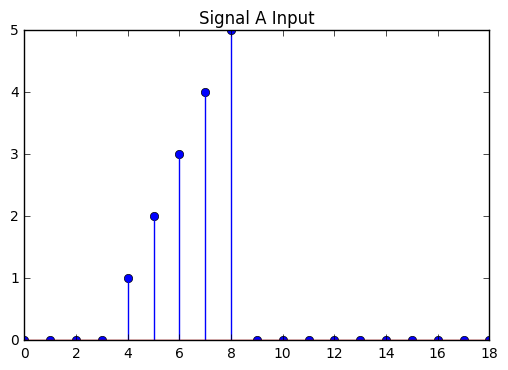

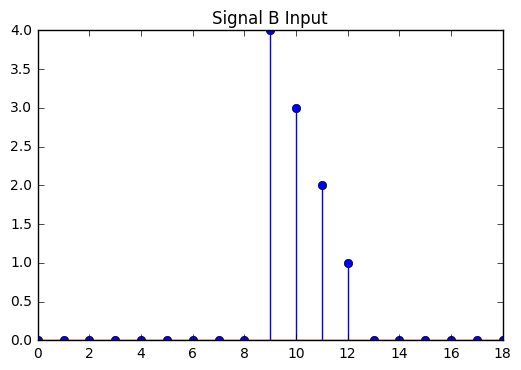

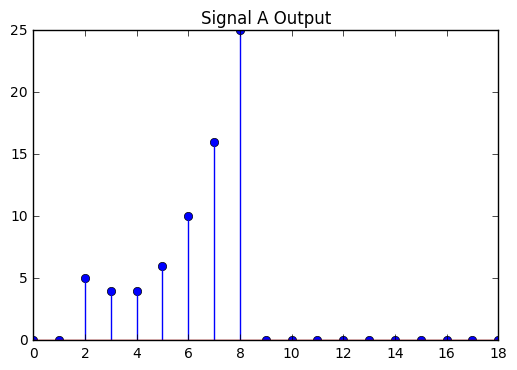

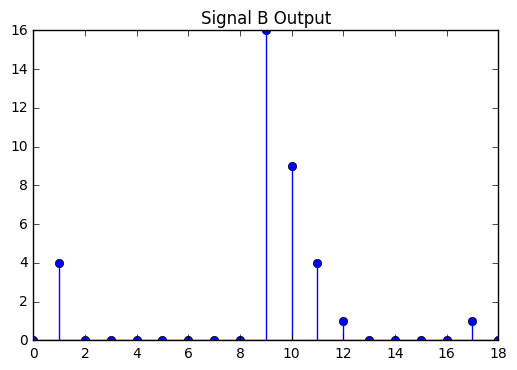

In [20]:
A=np.zeros(19)
A[4]=1
A[5]=2
A[6]=3
A[7]=4
A[8]=5
print(A)



B=np.zeros(19)
B[9]=4
B[10]=3
B[11]=2
B[12]=1

print (B)

plt.figure()
plt.stem(A)  
plt.title('Signal A Input')


plt.figure()
plt.stem(B)  
plt.title('Signal B Input')


Ar=np.zeros(19)
Br=np.zeros(19)


for i in np.arange(1,18):
    Ar[i]=(A[i]*A[i])+A[10.-i]
    

for j in np.arange(1,18):    
    Br[j]=(B[j]*B[j])+B[10.-j]
    

    
print(Ar)

print (Br)

plt.figure()
plt.stem(Ar)
plt.title('Signal A Output')



plt.figure()
plt.stem(Br)
plt.title('Signal B Output')